In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

def plot_class_distribution(class_labels, dataset_name, save_path=None, log_scale=False):
    """
    Plot a histogram of reaction class frequencies.

    Parameters
    ----------
    class_labels : list or array-like
        List of class labels for all reactions in the dataset.
        Example: ['oxidation', 'oxidation', 'reduction', ...]
    dataset_name : str
        Name of the dataset (e.g., 'USPTO_50k', 'Schneider', 'R1')
    save_path : str or None
        Optional file path to save the plot (e.g., 'hist_USPTO50k.png')
    log_scale : bool
        Whether to display the y-axis on a logarithmic scale (useful for heavy imbalance)
    """
    # count occurrences per class
    counts = pd.Series(class_labels).value_counts().sort_index()

    # create the plot
    fig, ax = plt.subplots(figsize=(8, 4))
    bars = ax.bar(np.arange(len(counts)), counts.values, color='steelblue', edgecolor='steelblue')

    ax.set_title(f"{dataset_name}", fontsize=13, weight='bold')
    ax.set_xlabel("Reaction Class", fontsize=11)
    # ax.set_ylabel("Number of Reactions", fontsize=11)
    # ax.set_xticks(np.arange(len(counts)))
    # ax.set_xticklabels(counts.index, rotation=90 if len(counts) > 15 else 0)
    if log_scale:
        ax.set_yscale("log")
    # for spine in ax.spines.values():
    #     spine.set_visible(False)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    # ax.set_xticklabels([])
    # ax.set_yticklabels([])
    # ax.tick_params(left=False, bottom=False)



    # optional gridlines for readability
    # ax.grid(axis='y', linestyle='--', alpha=0.5)
    # plt.tight_layout()

    # save or show
    if save_path:
        # plt.savefig(save_path, dpi=300, bbox_inches='tight')
        plt.savefig(f"{dataset_name}_distribution.pdf", format="pdf", bbox_inches="tight")
        plt.show()
        plt.close()
    else:
        plt.show()


# Schneirder dataset

In [2]:
data = pd.read_csv("../Data/raw/schneider50k_unbalanced.csv.gz",compression='gzip')  
data.head(2)


,rxn_class,source,rxn,split,y
0,6.1.5,US06887874,C1CCCCC1.CCO.CS(=O)(=O)N1CCN(Cc2ccccc2)CC1.[OH...,test,35
1,7.1.1,US07056926,CCOC(C)=O.Cc1cc([N+](=O)[O-])ccc1NC(=O)c1ccccc...,test,41


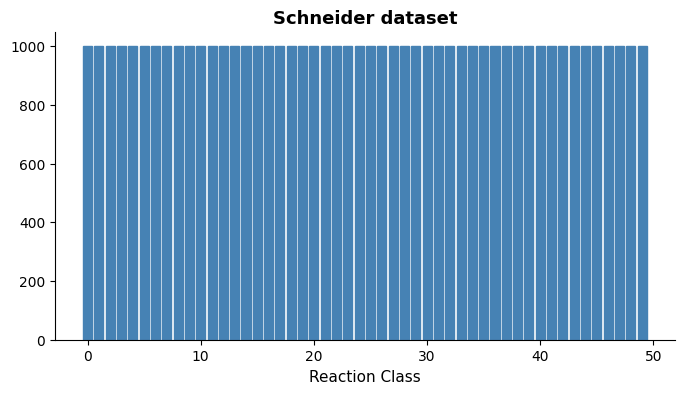

In [3]:
plot_class_distribution(data['y'], dataset_name="Schneider dataset", save_path=True)

# USPTO_TPL dataset

In [4]:
data = pd.read_csv("../Data/raw/USPTO_TPL_unbalanced.csv.gz",compression='gzip')  
data.head(2)

,rxn,rxn_class,split
0,CC(C)O.COc1ccc2nccc([C@@H](O)CC[C@@H]3CCN(C4CC...,366,test
1,CCCCSc1cc(C(=O)O)cc(S(N)(=O)=O)c1Cc1ccccc1.CCO...,47,test


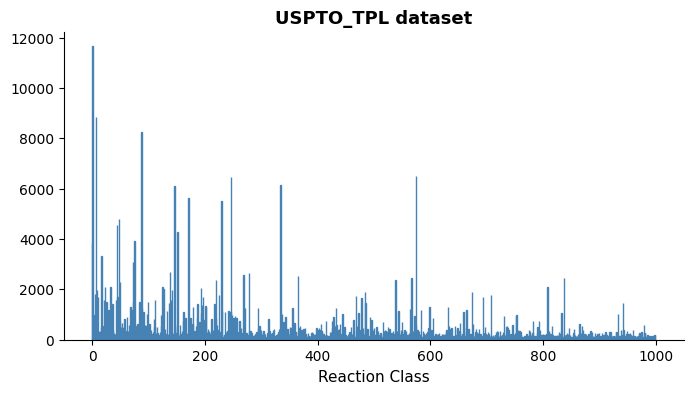

In [5]:
plot_class_distribution(data['rxn_class'], dataset_name="USPTO_TPL dataset", save_path=True)

# USPTO_50k dataset

In [6]:
data = pd.read_csv("../Data/raw/USPTO_50k_unbalanced.csv.gz",compression='gzip')  
data.head(2)

,reactions,new_class,split
0,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,5,train
1,Nc1cccc2cnccc12.O=C(O)c1cc([N+](=O)[O-])c(Sc2c...,1,train


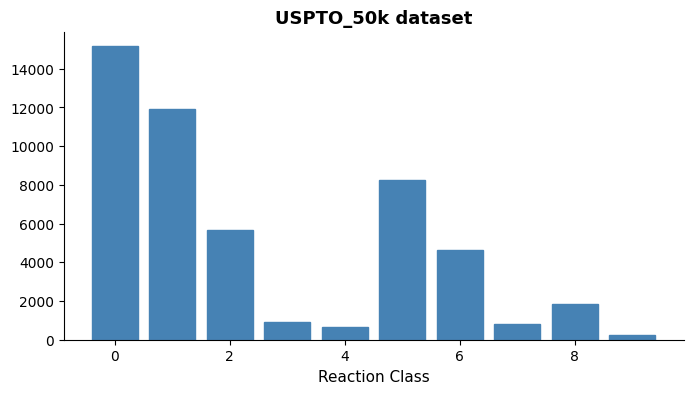

In [7]:
plot_class_distribution(data['new_class'], dataset_name="USPTO_50k dataset", save_path=True)

# Syntemp R0

In [8]:
data = pd.read_csv("../Data/raw/Syntemp_cluster.csv.gz",compression='gzip')  
data.head(2)

,R_ID,RSMI,New_R0,Split_R0,New_R1,Split_R1,New_R2,Split_R2
0,R_0,COC(=O)C(CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(OC)c...,0,train,0,train,0,train
1,R_1,Nc1cccc2cnccc12.O=C(O)c1cc([N+](=O)[O-])c(Sc2c...,1,train,13,train,6,test


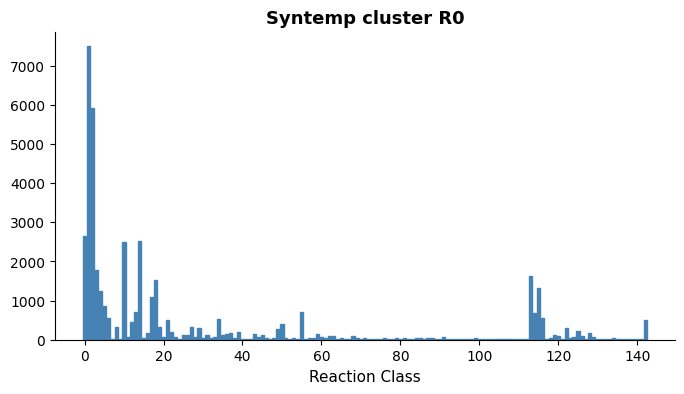

In [9]:
plot_class_distribution(data['New_R0'], dataset_name="Syntemp cluster R0", save_path=True)

# Syntemp R1

In [10]:
data = pd.read_csv("../Data/raw/Syntemp_cluster.csv.gz",compression='gzip')  
data.head(2)

,R_ID,RSMI,New_R0,Split_R0,New_R1,Split_R1,New_R2,Split_R2
0,R_0,COC(=O)C(CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(OC)c...,0,train,0,train,0,train
1,R_1,Nc1cccc2cnccc12.O=C(O)c1cc([N+](=O)[O-])c(Sc2c...,1,train,13,train,6,test


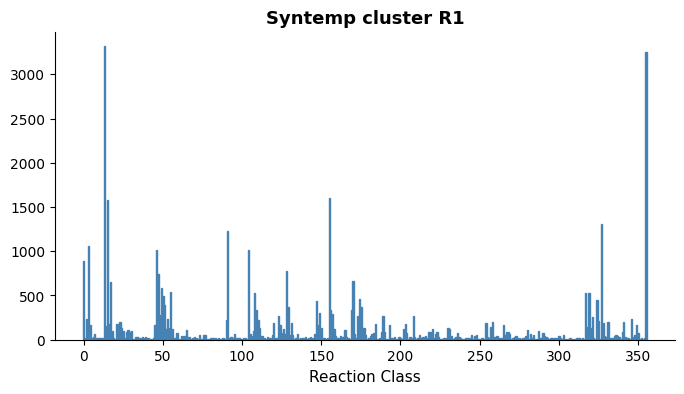

In [11]:
plot_class_distribution(data['New_R1'], dataset_name="Syntemp cluster R1", save_path=True)

# Syntemp R2

In [12]:
data = pd.read_csv("../Data/raw/Syntemp_cluster.csv.gz",compression='gzip')  
data.head(2)

,R_ID,RSMI,New_R0,Split_R0,New_R1,Split_R1,New_R2,Split_R2
0,R_0,COC(=O)C(CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(OC)c...,0,train,0,train,0,train
1,R_1,Nc1cccc2cnccc12.O=C(O)c1cc([N+](=O)[O-])c(Sc2c...,1,train,13,train,6,test


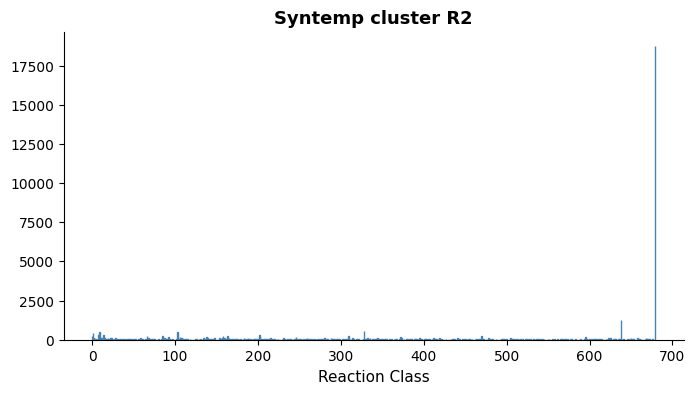

In [13]:
plot_class_distribution(data['New_R2'], dataset_name="Syntemp cluster R2", save_path=True)

# ECREACT 1st hierarchical level

In [14]:
data = pd.read_csv("../Data/raw/claire_full.csv.gz",compression='gzip')  
data.head(2)

C:\Users\chung\AppData\Local\Temp\ipykernel_10012\43837693.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Data/raw/claire_full.csv.gz",compression='gzip')


,Unnamed: 0,index,rxn_smiles,ec3,split,ec1,ec2,ec1_encode,ec2_encode,ec3_encode
0,0,0,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(...,1.2.1,train,1,1.2,0,0,0
1,1,1,C/C(C=O)=C\CC/C(C)=C/C=O.NC(=O)c1ccc[n+]([C@@H...,1.2.1,train,1,1.2,0,0,0


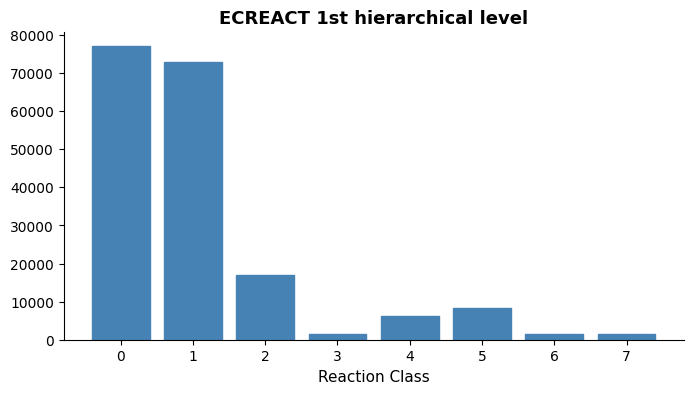

In [15]:
plot_class_distribution(data['ec1_encode'], dataset_name="ECREACT 1st hierarchical level", save_path=True)

# ECREACT 2nd hierarchical level

In [16]:
data = pd.read_csv("../Data/raw/claire_full.csv.gz",compression='gzip')  
data.head(2)

C:\Users\chung\AppData\Local\Temp\ipykernel_10012\43837693.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Data/raw/claire_full.csv.gz",compression='gzip')


,Unnamed: 0,index,rxn_smiles,ec3,split,ec1,ec2,ec1_encode,ec2_encode,ec3_encode
0,0,0,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(...,1.2.1,train,1,1.2,0,0,0
1,1,1,C/C(C=O)=C\CC/C(C)=C/C=O.NC(=O)c1ccc[n+]([C@@H...,1.2.1,train,1,1.2,0,0,0


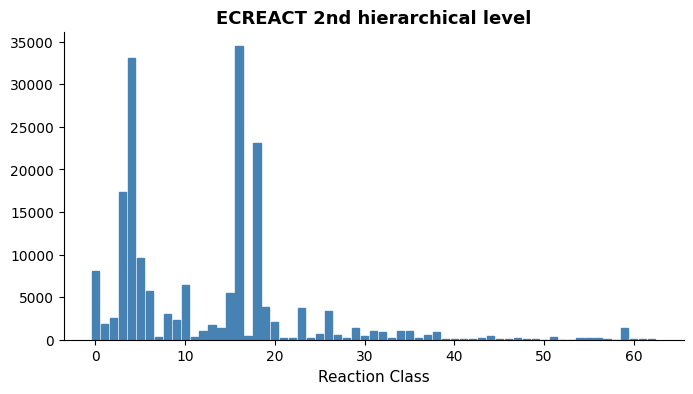

In [17]:
plot_class_distribution(data['ec2_encode'], dataset_name="ECREACT 2nd hierarchical level", save_path=True)

# ECREACT 3rd hierarchical level

In [18]:
data = pd.read_csv("../Data/raw/claire_full.csv.gz",compression='gzip')  
data.head(2)

C:\Users\chung\AppData\Local\Temp\ipykernel_10012\43837693.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv("../Data/raw/claire_full.csv.gz",compression='gzip')


,Unnamed: 0,index,rxn_smiles,ec3,split,ec1,ec2,ec1_encode,ec2_encode,ec3_encode
0,0,0,NC(=O)c1ccc[n+]([C@@H]2O[C@H](COP(=O)([O-])OP(...,1.2.1,train,1,1.2,0,0,0
1,1,1,C/C(C=O)=C\CC/C(C)=C/C=O.NC(=O)c1ccc[n+]([C@@H...,1.2.1,train,1,1.2,0,0,0


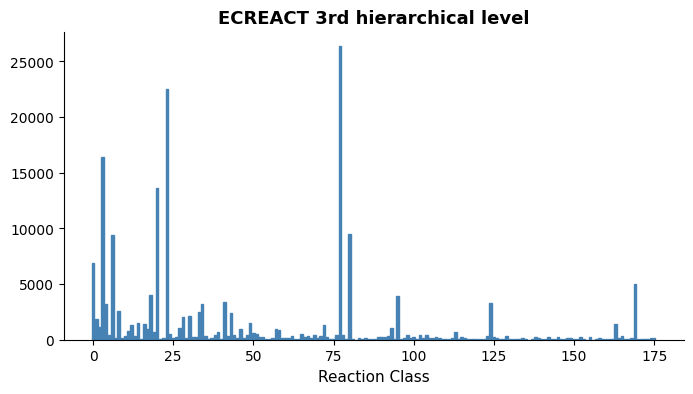

In [19]:
plot_class_distribution(data['ec3_encode'], dataset_name="ECREACT 3rd hierarchical level", save_path=True)

# Mech_18k 1st hierarchical level

In [20]:
data = pd.read_csv("../Data/raw/mech18k.csv.gz",compression='gzip')  
data.head(2)

,index,unmapped_reactions,original_reactions,updated_reaction,mechanistic_class,mechanistic_label,labels_lv1,y1,y2,split
0,0,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3][CH2:4][CH2...,[O:201]=[C:101]([O:202][CH2:203][c:204]1[cH:20...,Cbz_deprotection,"[(201, 301.1), ([301.1, 301], 301), (301, 203)...",6,0,0,train
1,1,COc1ccc(C(=O)Cc2c(Cl)c[n+]([O-])cc2Cl)c2c1OC1(...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([C:7](=[O:...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([C:7](=[O:...,carbonyl_reduction,"[([301, 301.1], 7), ([7, 8], 8), (8, 302.1), (...",7,1,1,test


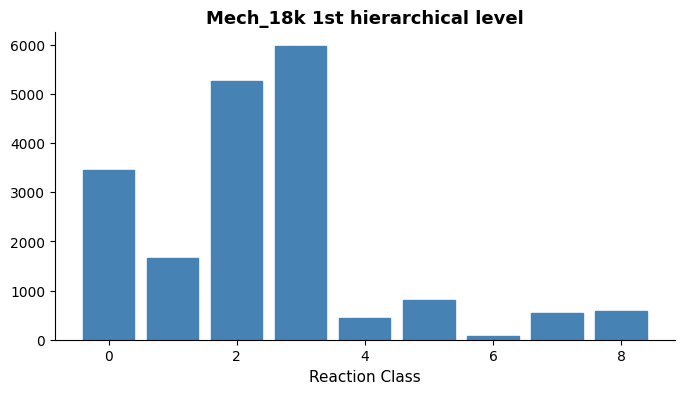

In [21]:
plot_class_distribution(data['y1'], dataset_name="Mech_18k 1st hierarchical level", save_path=True)

# Mech_18k 2nd hierarchical level

In [22]:
data = pd.read_csv("../Data/raw/mech18k.csv.gz",compression='gzip')  
data.head(2)

,index,unmapped_reactions,original_reactions,updated_reaction,mechanistic_class,mechanistic_label,labels_lv1,y1,y2,split
0,0,COC(=O)[C@H](CCCCNC(=O)OCc1ccccc1)NC(=O)Nc1cc(...,O=C(OCc1ccccc1)[NH:1][CH2:2][CH2:3][CH2:4][CH2...,[O:201]=[C:101]([O:202][CH2:203][c:204]1[cH:20...,Cbz_deprotection,"[(201, 301.1), ([301.1, 301], 301), (301, 203)...",6,0,0,train
1,1,COc1ccc(C(=O)Cc2c(Cl)c[n+]([O-])cc2Cl)c2c1OC1(...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([C:7](=[O:...,[CH3:1][O:2][c:3]1[cH:4][cH:5][c:6]([C:7](=[O:...,carbonyl_reduction,"[([301, 301.1], 7), ([7, 8], 8), (8, 302.1), (...",7,1,1,test


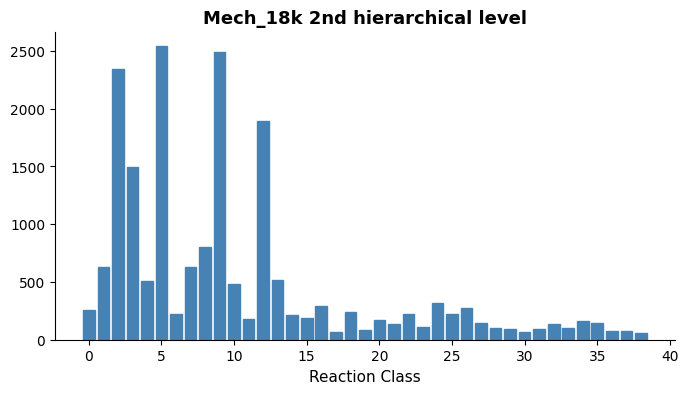

In [23]:
plot_class_distribution(data['y2'], dataset_name="Mech_18k 2nd hierarchical level", save_path=True)